<a href="https://colab.research.google.com/github/karanbhatt1/MachineLearning/blob/main/TimeSeries_Handson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [79]:
df = pd.read_csv("/content/AirPassengers.csv")

In [80]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [82]:
df['Month']= pd.to_datetime(df['Month'])

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [84]:
df.index = df['Month']

In [85]:
df

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
...,...,...
1960-08-01,1960-08-01,606
1960-09-01,1960-09-01,508
1960-10-01,1960-10-01,461


In [86]:
df.isnull().sum()

,0
Month,0
#Passengers,0


In [87]:
df.duplicated().sum()


0

In [88]:
df.drop('Month',axis=1,inplace=True)

In [89]:
# running Ad fuller test to find the probability value:
from statsmodels.tsa.stattools import adfuller

In [90]:
def isStationary(pval,alpha=0.05):
  if(pval<alpha):
    print(f"{pval} is less than {alpha}.\n The data is stationary.")
  else:
    print("The data is not stationary")

In [91]:
res = adfuller(df)
p_val = res[1]
isStationary(p_val)

The data is not stationary


In [92]:
roll_mean = df.rolling(window=12).mean()
roll_std = df.rolling(window=12).std()

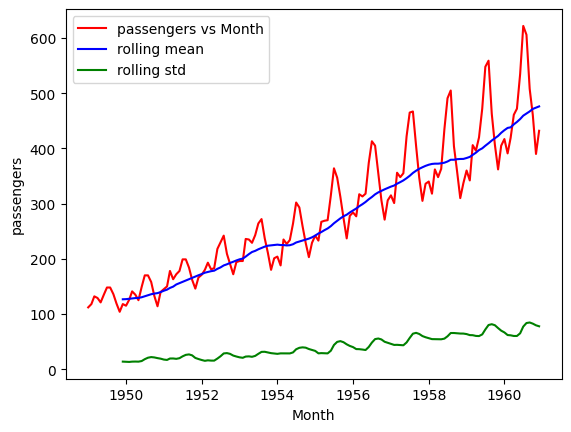

In [93]:
# data before preprocessing is non-stationary.
ts= plt.plot(df,color="red",label="passengers vs Month")
plt.xlabel("Month")
plt.ylabel("passengers")
plt.plot(roll_mean,color="blue",label="rolling mean")
plt.plot(roll_std,color="green",label="rolling std")
plt.legend()
plt.show()

In [94]:
plt.savefig("passengers.png")

<Figure size 640x480 with 0 Axes>

In [95]:
# performing diffrencing operation on the passenger data set

In [96]:
roll_mean[0:12]

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [97]:
df_detrended = df - roll_mean

In [98]:
df_detrended.dropna(inplace = True)

In [99]:
df_detrended

,#Passengers
Month,
1949-12-01,-8.666667
1950-01-01,-11.916667
1950-02-01,-1.583333
1950-03-01,12.666667
1950-04-01,6.166667
...,...
1960-08-01,142.666667
1960-09-01,40.916667
1960-10-01,-10.583333


In [100]:
res = adfuller(df_detrended)
p_val = res[1]
isStationary(p_val)

0.022104139473878875 is less than 0.05.
 The data is stationary.


In [101]:
roll_mean_detrend = df_detrended.rolling(window=12).mean()
roll_std_detrend = df_detrended.rolling(window=12).std()

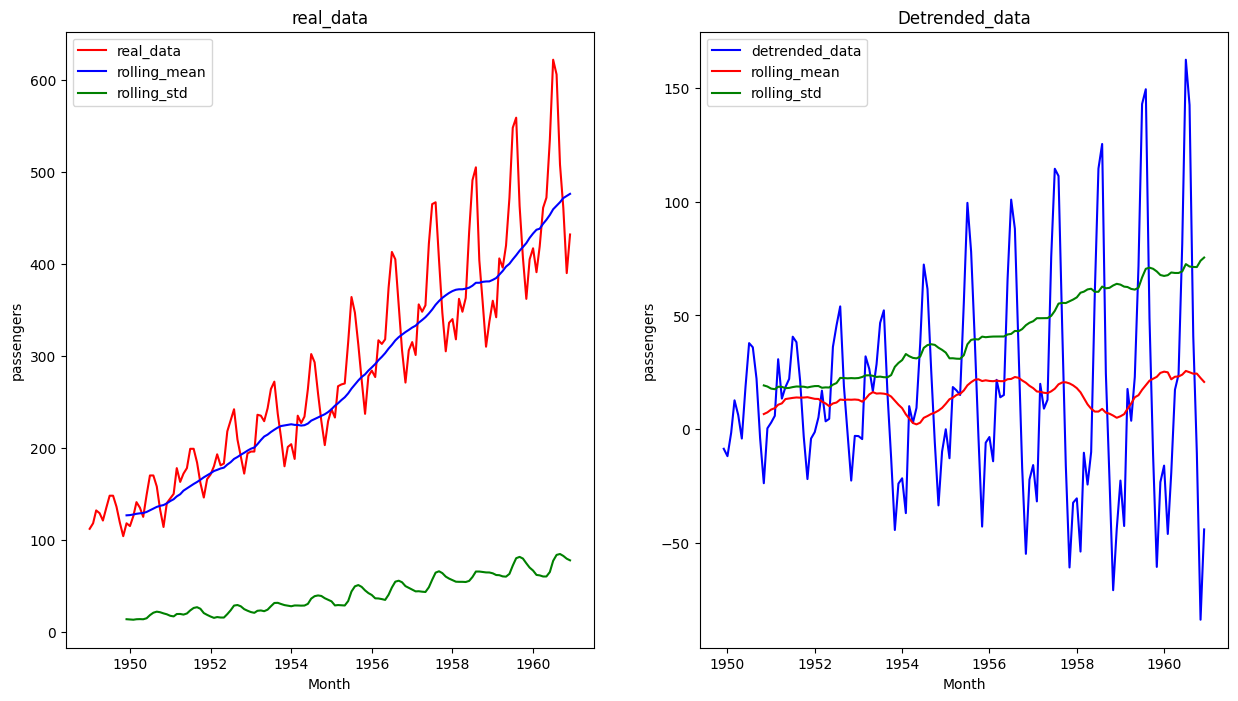

In [102]:
fig, ax = plt.subplots(1,2, figsize = (15,8))
ax[0].plot(df, color = "red",label="real_data")
ax[0].set_title("real_data")
ax[0].set_xlabel("Month")
ax[0].set_ylabel("passengers")
ax[0].plot(roll_mean, color = "blue",label="rolling_mean")
ax[0].plot(roll_std, color = "green",label="rolling_std")
ax[0].legend()
ax[1].plot(df_detrended, color = "blue",label="detrended_data")
ax[1].set_title("Detrended_data")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("passengers")
ax[1].plot(roll_mean_detrend, color = "red",label="rolling_mean")
ax[1].plot(roll_std_detrend, color = "green",label="rolling_std")
ax[1].legend()
plt.legend()
plt.show()


In [103]:
# NOW the data is finally Stationary so doing further steps:
#i.e plotting ACF , PACF plots .
# And finding the p , q for AR(p)MA(Q) model

Spliting Data into train and test

In [104]:
train = df_detrended[:120] #10 years
test = df_detrended[120:]  # 1 year

In [105]:
train

,#Passengers
Month,
1949-12-01,-8.666667
1950-01-01,-11.916667
1950-02-01,-1.583333
1950-03-01,12.666667
1950-04-01,6.166667
...,...
1959-07-01,143.083333
1959-08-01,149.583333
1959-09-01,48.666667


In [106]:
test

,#Passengers
Month,
1959-12-01,-23.333333
1960-01-01,-16.083333
1960-02-01,-46.166667
1960-03-01,-19.250000
1960-04-01,17.333333
1960-05-01,24.000000
1960-06-01,81.750000
1960-07-01,162.583333
1960-08-01,142.666667


In [107]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [108]:
# ACF Autocorelation function

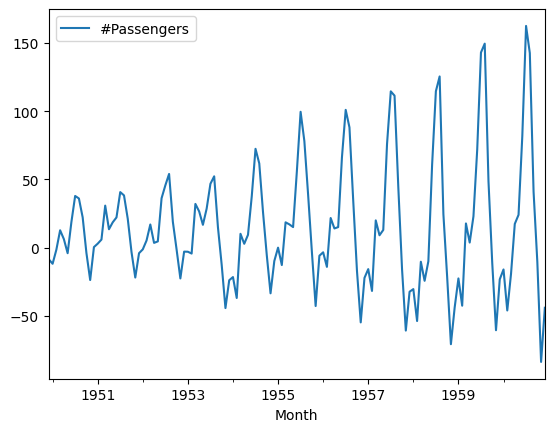

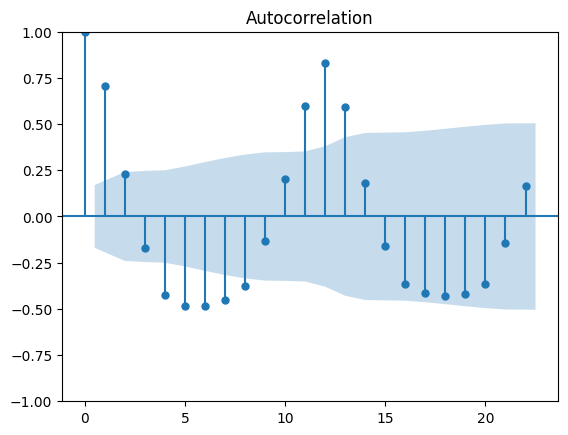

In [109]:
df_detrended.plot()
plot_acf(df_detrended['#Passengers'])
plt.show()

In [110]:
# Auto Arima --> it check all the neccessary things to get the best model

In [111]:
#PACF --> partial auto corellation function

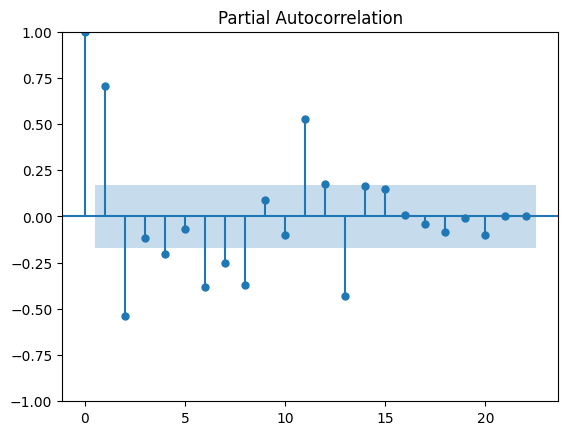

In [112]:
plot_pacf(df_detrended['#Passengers'])
plt.show()

In [113]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [114]:
model = ARIMA(train, order = (13,0,13))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [115]:
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [116]:
df_detrended['Arima_prediction'] = model_fit.predict(start=len(train),end=len(df_detrended)) # in time series we have to give the index and we need to tell start and end point

KeyError: 'predicted'

KeyError: 'predicted'

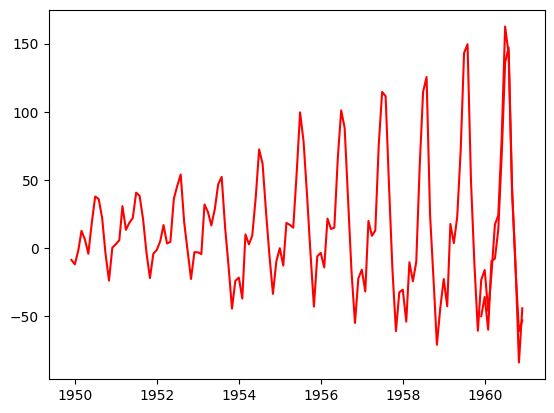

In [118]:
plt.plot(df_detrended, color = 'red')
plt.plot(df_detrended['predicted'], color = 'blue')
plt.show()

In [ ]:
#!pip install numpy==1.23.5 scipy==1.10.1

In [119]:
!pip install pmdarima

In [120]:
from pmdarima import auto_arima

In [121]:
auto = auto_arima(df_detrended['#Passengers'])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [122]:
auto.summary() # best model SARIMAX with p = 3 , d = 0 , and q = 2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  133
Model:               SARIMAX(3, 0, 2)   Log Likelihood                -612.905
Date:                Sat, 02 Aug 2025   AIC                           1239.810
Time:                        07:37:00   BIC                           1260.043
Sample:                    12-01-1949   HQIC                          1248.032
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.8579      1.701      4.033      0.000       3.525      10.191
ar.L1          0.8625      0.171      5.045      0.000       0.527       1.198
ar.L2          0.2071      0.236      0.878      0.380      -0.255       0.670
ar.L3         -0.5239      0.142     -3.683      0.000      -0.803      -0.245
ma.L1          0.0684      0.138      0.496      0.620      -0.202       0.338
ma.L2         -0.7564      0.091     -8.293      0.000      -0.935      -0.578
sigma2       577.4777     71.847      8.038      0.000     436.660     718.295
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 8.11
Prob(Q):                              0.89   Prob(JB):                         0.02
Heteroskedasticity (H):               6.21   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [123]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [124]:
model_sarimax = SARIMAX(train, order = (3,0,2), seasonal_order = (3,0,2,12))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [125]:
model_fit_sari = model_sarimax.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [126]:
df_detrended['predicted'] = model_fit_sari.predict(start=len(train),end=len(df_detrended))

In [127]:
df_detrended

,#Passengers,Arima_prediction,predicted
Month,,,
1949-12-01,-8.666667,NaN,NaN
1950-01-01,-11.916667,NaN,NaN
1950-02-01,-1.583333,NaN,NaN
1950-03-01,12.666667,NaN,NaN
1950-04-01,6.166667,NaN,NaN
...,...,...,...
1960-08-01,142.666667,147.090339,140.425823
1960-09-01,40.916667,43.719458,36.884048
1960-10-01,-10.583333,-14.046491,-19.017905


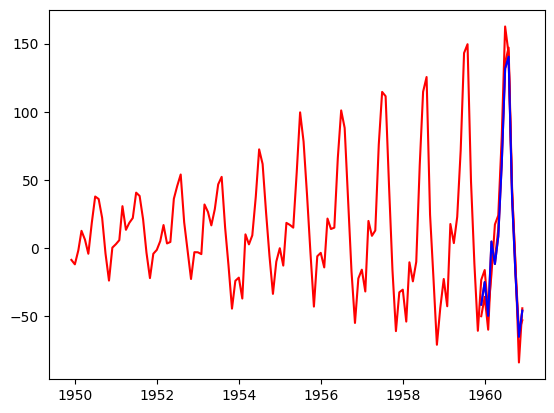

In [128]:
plt.plot(df_detrended, color = 'red')
plt.plot(df_detrended['predicted'], color = 'blue')
plt.show()

In [169]:
forecasted = model_fit_sari.get_forecast(steps = 72)  #(test + next needed period) (12+12)
future_preds = forecasted.predicted_mean

In [170]:
forecasted

Text(0, 0.5, 'passengers')

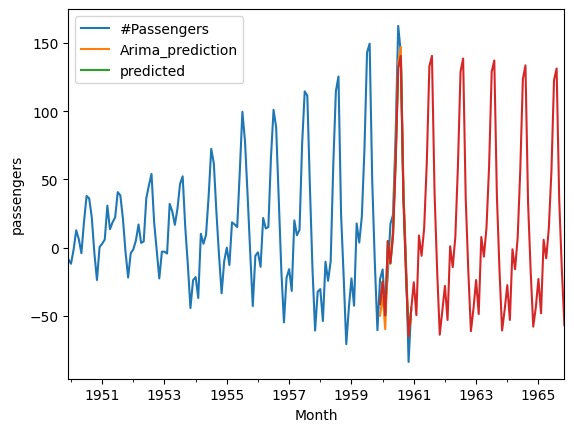

In [171]:
df_detrended.plot()
future_preds.plot()
plt.xlabel("Month")
plt.ylabel("passengers")